In [2]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_curve, auc, precision_recall_curve)


In [3]:

# --- Load Data ---
train_df = pd.read_csv('xray_features_train.csv')
test_df = pd.read_csv('xray_features_test.csv')

# Split features and labels
X_train = train_df[[f'Feat_{i}' for i in range(64)]].values
y_train = train_df['Label'].values

X_test = test_df[[f'Feat_{i}' for i in range(64)]].values
y_test = test_df['Label'].values


In [4]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:

# --- Hyperparameter Tuning SVM ---
param_grid = {
    'C':[0.1, 1, 10, 100], 
    'gamma':[1, 0.1, 0.01, 0.001], 
    'kernel':['linear']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   2.3s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.6s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   2.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.9s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   3.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=2)

In [12]:

best_model = grid.best_estimator_


In [13]:

# --- Predictions ---
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.decision_function(X_test_scaled)


In [14]:

# --- Evaluation ---
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73       234
           1       0.80      0.98      0.88       390

    accuracy                           0.84       624
   macro avg       0.88      0.79      0.81       624
weighted avg       0.86      0.84      0.83       624

Accuracy: 0.8365384615384616


In [15]:

# --- Plots ---
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def plot_precision_recall(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()


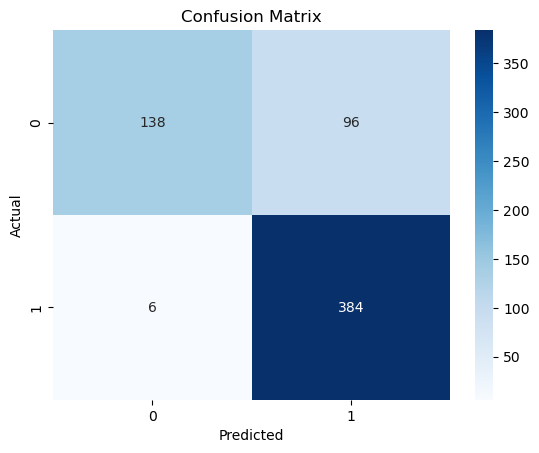

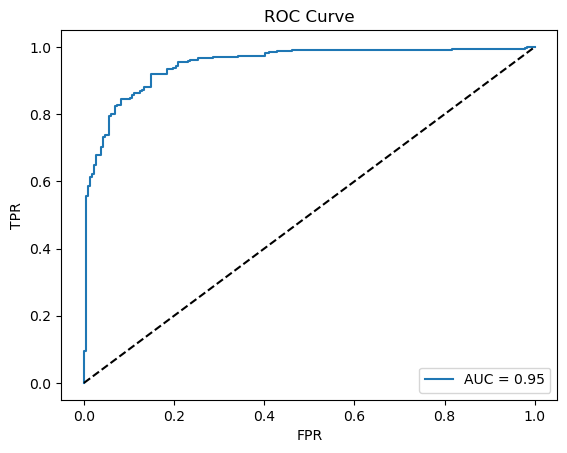

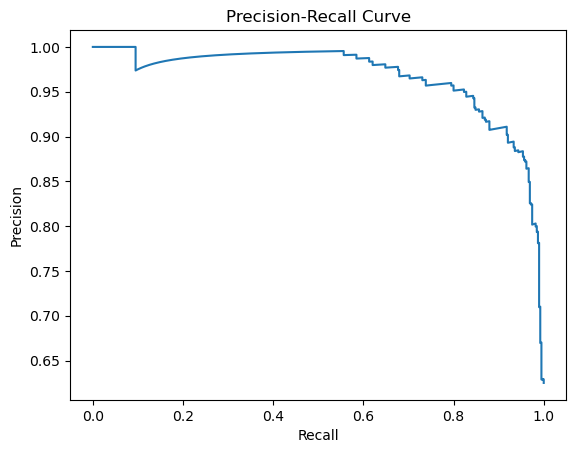

In [16]:

plot_confusion_matrix(y_test, y_pred)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)
